In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

%config InlineBackend.figure_format = 'retina'

In [2]:
day = re.compile(r'^(\d{1,2}) day(?:s?)$')
month = re.compile(r'^(\d{1,2}) month(?:s?)$')

def durtnum(dur):
    day_s = day.search(dur)
    if day_s:
        return int(day_s.group(1))
    
    month_s = month.search(dur)
    if month_s:
        return int(month_s.group(1)) * 30
    
    return np.nan

In [4]:
df = pd.read_csv('../../GoFundMe/data/projects.csv').dropna()

df['duration'] = df['duration'].apply(durtnum)

print(len(df))
df.sample(5)

658


,url,name,location,launched,month,year,amt_raised,goal,backers,mean_donation,text_length_words,duration,text
273,https://www.gofundme.com/please-help-leah-mari...,Please help Leah Marie fight cancer.,"SWARTHMORE, PA",2018-12-05,12.0,2018.0,38157.0,50000.0,404.0,94.448020,156.0,30,"Hello, My niece Leah Marie Watson was born on..."
631,https://www.gofundme.com/qgrqpxs4,Justin's Brain Cancer Fund,"Hamilton , ON",2016-04-02,4.0,2016.0,178806.0,350000.0,1146.0,156.026178,1723.0,1020,BUFFALO WILD WINGS FUNDRAISER FOR JUSTIN MASOT...
648,https://www.gofundme.com/GiannaDorn,Gianna Dorn's Cancer Treatment,"OWINGS MILLS, MD",2017-09-12,9.0,2017.0,7194.0,100000.0,119.0,60.453782,197.0,480,"Dear friends and family, All of us at The Mary..."
506,https://www.gofundme.com/cancer-alternative-me...,Cancer Medical Fund,"NORTH BEND, OR",2017-02-23,2.0,2017.0,7798.0,10000.0,74.0,105.378378,152.0,690,"I'm reaching out to the community , friends &..."
441,https://www.gofundme.com/jerics-cancer-fight,Jeric's Cancer Fight,"Greely, ON",2018-01-24,1.0,2018.0,6189.0,5000.0,63.0,98.238095,164.0,360,"Last summer, my brother and sister-in-law hear..."


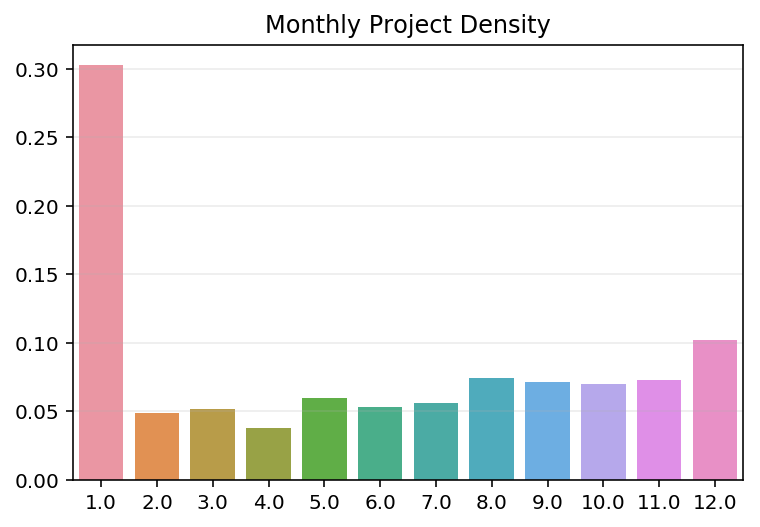

In [5]:
vc = df['month'].value_counts() / len(df)
sns.barplot(vc.index, vc.values)
plt.grid(alpha=0.25, axis='y')
plt.title('Monthly Project Density');

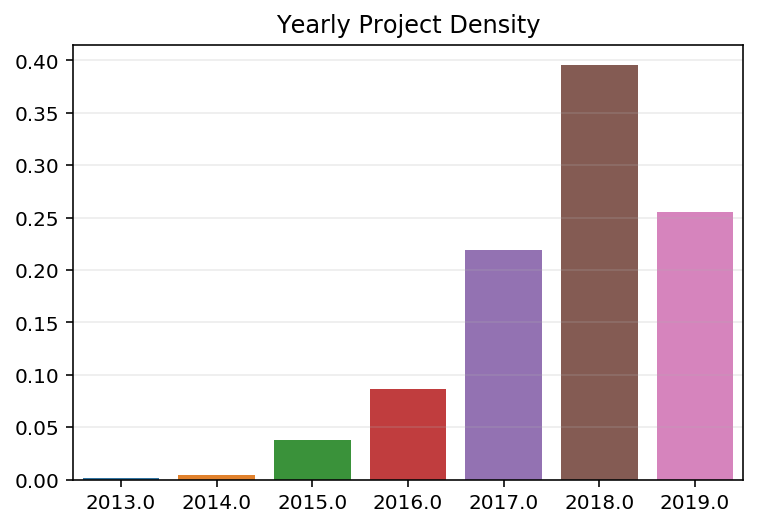

In [6]:
vc = df['year'].value_counts() / len(df)
sns.barplot(vc.index, vc.values)
plt.grid(alpha=0.25, axis='y')
plt.title('Yearly Project Density');

/Users/alex/anaconda3/envs/nlp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


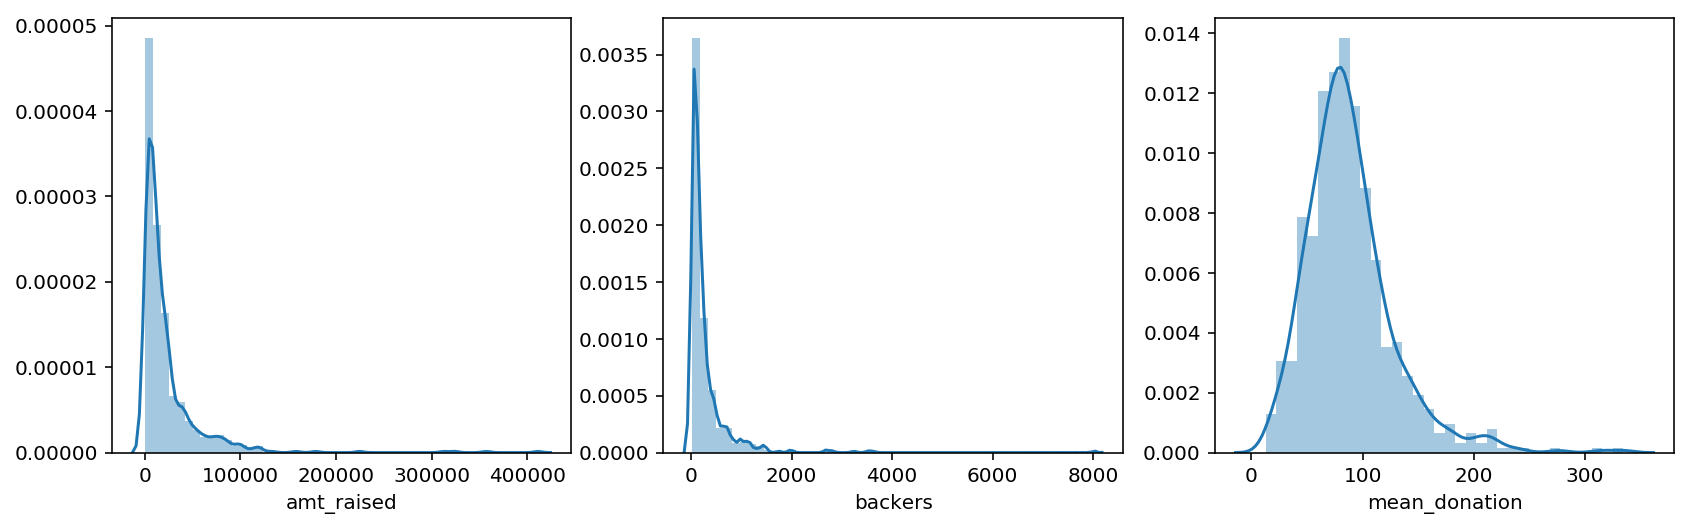

In [7]:
plt.subplots(figsize=(14,4))

plt.subplot(131)
sns.distplot(df['amt_raised'])
plt.subplot(132)
sns.distplot(df['backers'])
plt.subplot(133)
sns.distplot(df['mean_donation'])

In [11]:
df['status'] = (df['amt_raised'] / df['goal'] >= 1)
'Successful: ', (df['status']).mean()

('Successful: ', 0.1884498480243161)

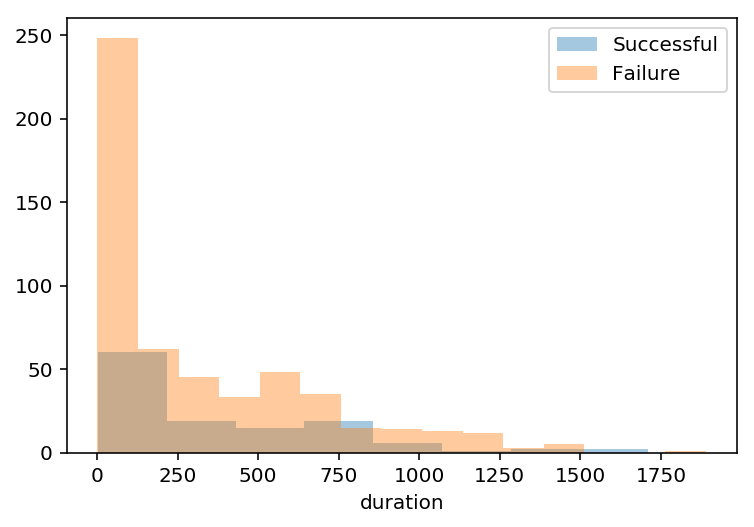

In [14]:
sns.distplot(df.loc[df['status'] == 1, 'duration'], kde=False, label='Successful')
sns.distplot(df.loc[df['status'] == 0, 'duration'], kde=False, label='Failure')
plt.legend();

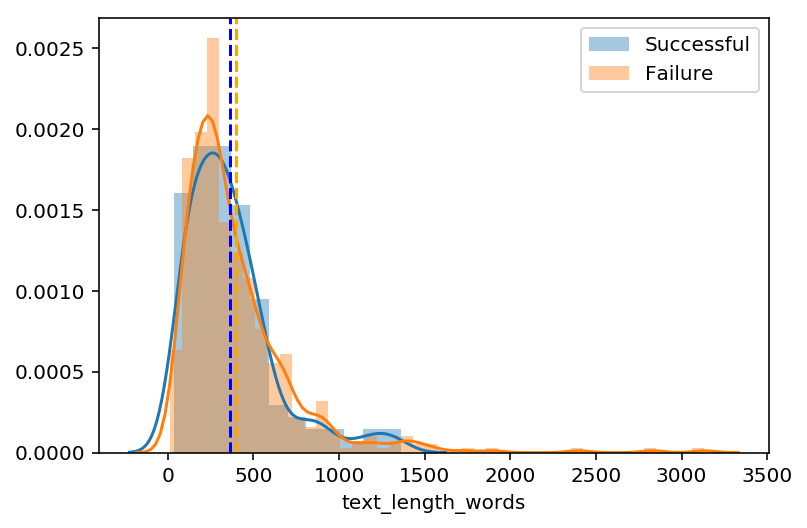

In [16]:
g = sns.distplot(df.loc[df['status'] == 1, 'text_length_words'], label='Successful')
sns.distplot(df.loc[df['status'] == 0, 'text_length_words'], label='Failure')
g.axvline(df.loc[df['status'] == 1, 'text_length_words'].mean(), c='blue', linestyle='--')
g.axvline(df.loc[df['status'] == 0, 'text_length_words'].mean(), c='orange', linestyle='--')
plt.legend();

In [18]:
df.groupby('status')['goal'].mean(), df.groupby('status')['goal'].quantile(0.5)

(status
 False    50157.001873
 True     17411.588710
 Name: goal, dtype: float64, status
 False    25000.0
 True     10000.0
 Name: goal, dtype: float64)

Mean donation is a bit less left skewed, more small values

No definite ending period, so projects are much longer too: some over 1500 days

Most projects (30%) are concentrated in January - could be a sampling error (the search results are the most recently updated)

Most projects were also launched in 2018

Seems like the word count distributions are similar to Kickstarter projects

No such thing as staff pick projects

No categories either, seems like most are "donate to relieve the medical expenses" or "donate to help this person live their last days well"

